In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
gingham = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')
juno = loadAllTopicData('juno')
lark = loadAllTopicData('lark')
gotham = loadAllTopicData('gotham')
reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphithe

In [2]:
X, y, Xtest, ytest = createData([origImg, clarendon, gingham, juno, lark, gotham, reyes], .8)

9000
9000
9000
9000
9000
9000
9000


In [7]:
X.shape

(50400, 128, 128, 3)

In [3]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)
bins = 300
categories = 7
Xhist = threeChannelHistogram(X, bins)

In [29]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
model.fit(Xhist, y, epochs=100, batch_size=128)

Epoch 1/100
50400/50400 [==============================] - 3s 69us/step - loss: 1.7461 - acc: 0.3587
Epoch 2/100
50400/50400 [==============================] - 3s 62us/step - loss: 1.1441 - acc: 0.5238
Epoch 3/100
50400/50400 [==============================] - 3s 57us/step - loss: 1.0419 - acc: 0.5605
Epoch 4/100
50400/50400 [==============================] - 3s 54us/step - loss: 0.9871 - acc: 0.5859
Epoch 5/100
50400/50400 [==============================] - 3s 56us/step - loss: 0.9537 - acc: 0.6110
Epoch 6/100
50400/50400 [==============================] - 3s 56us/step - loss: 0.9258 - acc: 0.6279
Epoch 7/100
50400/50400 [==============================] - 3s 55us/step - loss: 0.8784 - acc: 0.6609
Epoch 8/100
50400/50400 [==============================] - 3s 53us/step - loss: 0.8488 - acc: 0.6767
Epoch 9/100
50400/50400 [==============================] - 3s 53us/step - loss: 0.8185 - acc: 0.6873
Epoch 10/100
50400/50400 [==============================] - 3s 53us/step - loss: 0.8002 - a

In [31]:
def threeChannelHistogram(images, bins):
    histograms = []
    for image in images:
        redHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        greenHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        blueHist = np.histogram(image[:, :, 0], bins=bins, range=(0, 255))[0]
        #print(np.hstack((redHist, greenHist, blueHist)))
        histograms.append(np.hstack((redHist, greenHist, blueHist)))
        #histograms.append(np.histogram(image, bins=bins, range=(0, 255))[0])
    return np.stack(histograms)
from sklearn.metrics import precision_recall_fscore_support
Xhisttest = threeChannelHistogram(Xtest, bins=bins)
predict = model.predict(Xhisttest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest.argmax(axis=1), predict.argmax(axis=1)))
precision_recall_fscore_support(ytest.argmax(axis=1), predict.argmax(axis=1))

[[ 991  216   24  292  123  121   33]
 [  83 1421    5  227   11   40   13]
 [   5    0 1772    0    0    0   23]
 [  94  226    7 1395   52   16   10]
 [ 331   76   11  498  835   27   22]
 [  44   17    1    9    7 1722    0]
 [  50   16   72   32   40    0 1590]]
0.7719047619047619


(array([0.62015019, 0.72058824, 0.93657505, 0.5686914 , 0.78183521,
        0.894081  , 0.94027203]),
 array([0.55055556, 0.78944444, 0.98444444, 0.775     , 0.46388889,
        0.95666667, 0.88333333]),
 array([0.58328428, 0.75344645, 0.95991333, 0.65600752, 0.58228731,
        0.92431562, 0.91091378]),
 array([1800, 1800, 1800, 1800, 1800, 1800, 1800], dtype=int64))

In [28]:
from preprocessing import *
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(32, input_dim=bins * 3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(categories, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xhist, y, epochs=100, batch_size=128)

Epoch 1/100
50400/50400 [==============================] - 3s 56us/step - loss: 2.2428 - acc: 0.1536
Epoch 2/100
50400/50400 [==============================] - 2s 46us/step - loss: 1.9383 - acc: 0.1471
Epoch 3/100
50400/50400 [==============================] - 2s 43us/step - loss: 1.9461 - acc: 0.1416
Epoch 4/100
50400/50400 [==============================] - 3s 50us/step - loss: 1.9470 - acc: 0.1413
Epoch 5/100
50400/50400 [==============================] - 2s 47us/step - loss: 1.9467 - acc: 0.1406
Epoch 6/100
50400/50400 [==============================] - 2s 46us/step - loss: 1.9467 - acc: 0.1415
Epoch 7/100
50400/50400 [==============================] - 2s 45us/step - loss: 1.9467 - acc: 0.1393
Epoch 8/100
50400/50400 [==============================] - 2s 43us/step - loss: 1.9467 - acc: 0.1424
Epoch 9/100
50400/50400 [==============================] - 2s 42us/step - loss: 1.9467 - acc: 0.1384
Epoch 10/100
50400/50400 [==============================] - ETA: 0s - loss: 1.9467 - acc: 0

KeyboardInterrupt: 

[[ 998  148   25  161  316  101   51]
 [ 165 1249    6  289   33   40   18]
 [   3    0 1772    0    0    0   25]
 [ 112  194    8 1149  274   45   18]
 [ 213   28   12  220 1251   46   30]
 [  61   20    2    9   16 1691    1]
 [  20    4   51   10   42    0 1673]]


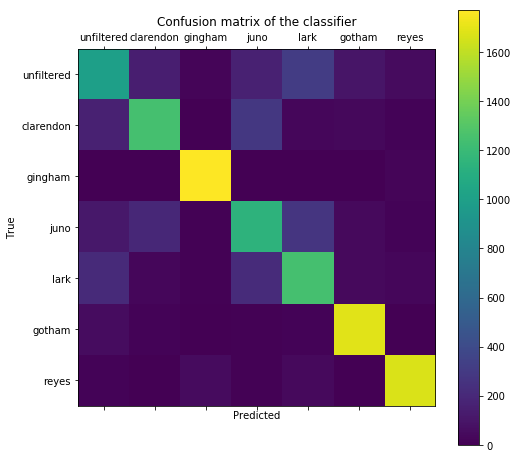

In [27]:
from sklearn.metrics import confusion_matrix
labels = ['unfiltered', 'clarendon', 'gingham', 'juno', 'lark', 'gotham', 'reyes']
cm = confusion_matrix(ytest.argmax(axis=1), predict.argmax(axis=1))
print(cm)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
from keras.models import load_model
model.save('NNFilterClassifier.h5')

In [4]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.